# Final Project Part 2

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline

## Import data

In [2]:
engagement_raw = pd.read_csv('engagement_subset.csv')

   ### Remove extraneous data

In [3]:
engagement = engagement_raw.drop(['email','launch_id', 'product_featured', 'product_subject', 'date_launched','clicked','unsubscribed'], axis='columns')

## Explore data

In [4]:
engagement.shape

(189318, 16)

A total of 189318 records and 16 attributes (15 potential features, 1 target variable)

In [5]:
engagement.index

RangeIndex(start=0, stop=189318, step=1)

In [12]:
engagement.columns

Index(['cellcode', 'product_discipline', 'month', 'is_academic_email',
       'is_china_recipient', 'is_responder', 'responses',
       'is_recent_responder', 'recent_responses', 'is_submitter_subject',
       'is_submitter_discipline', 'is_submitter_recent_subject',
       'is_submitter_recent_discipline', 'has_subject_code_match',
       'has_discipline_code_match', 'engaged'],
      dtype='object')

In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189318 entries, 0 to 189317
Data columns (total 16 columns):
cellcode                          189318 non-null object
product_discipline                189318 non-null object
month                             189318 non-null int64
is_academic_email                 189318 non-null int64
is_china_recipient                189318 non-null int64
is_responder                      189318 non-null int64
responses                         189318 non-null int64
is_recent_responder               189318 non-null int64
recent_responses                  189318 non-null int64
is_submitter_subject              189318 non-null int64
is_submitter_discipline           189318 non-null int64
is_submitter_recent_subject       189318 non-null int64
is_submitter_recent_discipline    189318 non-null int64
has_subject_code_match            189318 non-null int64
has_discipline_code_match         189318 non-null int64
engaged                           189318 non-nu

In [7]:
engagement.dtypes

cellcode                          object
product_discipline                object
month                              int64
is_academic_email                  int64
is_china_recipient                 int64
is_responder                       int64
responses                          int64
is_recent_responder                int64
recent_responses                   int64
is_submitter_subject               int64
is_submitter_discipline            int64
is_submitter_recent_subject        int64
is_submitter_recent_discipline     int64
has_subject_code_match             int64
has_discipline_code_match          int64
engaged                            int64
dtype: object

Cellcode and product_discipline are categorical data types and would need to be dummied/converted to numeric variables

## Understanding the data

### General Summary

In [8]:
engagement.head(5)

,cellcode,product_discipline,month,is_academic_email,is_china_recipient,is_responder,responses,is_recent_responder,recent_responses,is_submitter_subject,is_submitter_discipline,is_submitter_recent_subject,is_submitter_recent_discipline,has_subject_code_match,has_discipline_code_match,engaged
0,HOUSE,Clinical Medicine,1,1,0,1,20,0,0,0,0,0,0,0,0,0
1,HOUSE,Clinical Medicine,1,1,0,1,2,0,0,0,0,0,0,0,1,0
2,HOUSE,Clinical Medicine,1,0,1,1,4,1,1,1,1,0,0,1,1,0
3,HOUSE,Clinical Medicine,1,1,0,1,1,0,0,0,0,0,0,0,0,1
4,HOUSE,Clinical Medicine,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [9]:
engagement.tail(5)

,cellcode,product_discipline,month,is_academic_email,is_china_recipient,is_responder,responses,is_recent_responder,recent_responses,is_submitter_subject,is_submitter_discipline,is_submitter_recent_subject,is_submitter_recent_discipline,has_subject_code_match,has_discipline_code_match,engaged
189313,ST,Clinical Medicine,3,1,0,1,6,0,0,0,1,0,0,0,0,0
189314,ST,Clinical Medicine,3,0,0,1,1,0,0,0,1,0,0,0,1,0
189315,HOUSE,Clinical Medicine,3,0,1,1,12,1,1,0,0,0,0,1,1,0
189316,ST,Clinical Medicine,3,0,0,1,134,1,5,0,1,0,0,0,1,1
189317,HOUSE,Clinical Medicine,3,1,1,1,1,0,0,0,1,0,1,0,1,0


In [10]:
engagement.isnull().sum()

cellcode                          0
product_discipline                0
month                             0
is_academic_email                 0
is_china_recipient                0
is_responder                      0
responses                         0
is_recent_responder               0
recent_responses                  0
is_submitter_subject              0
is_submitter_discipline           0
is_submitter_recent_subject       0
is_submitter_recent_discipline    0
has_subject_code_match            0
has_discipline_code_match         0
engaged                           0
dtype: int64

In [11]:
engagement.describe()

,month,is_academic_email,is_china_recipient,is_responder,responses,is_recent_responder,recent_responses,is_submitter_subject,is_submitter_discipline,is_submitter_recent_subject,is_submitter_recent_discipline,has_subject_code_match,has_discipline_code_match,engaged
count,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000,189318.000000
mean,1.957357,0.265659,0.159758,0.837374,19.313552,0.494137,2.873779,0.096710,0.530277,0.019407,0.113465,0.092875,0.671838,0.195444
std,0.809719,0.441685,0.366382,0.369025,29.371721,0.499967,5.767999,0.295564,0.499084,0.137949,0.317161,0.290259,0.469545,0.396543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,0.000000,1.000000,24.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,560.000000,1.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
engagement.describe(include='object')

,cellcode,product_discipline
count,189318,189318
unique,5,2
top,HOUSE,Clinical Medicine
freq,110063,127676


### Analyzing numerical variables

In [13]:
# Tabulate correlation
engagement.corr()

,month,is_academic_email,is_china_recipient,is_responder,responses,is_recent_responder,recent_responses,is_submitter_subject,is_submitter_discipline,is_submitter_recent_subject,is_submitter_recent_discipline,has_subject_code_match,has_discipline_code_match,engaged
month,1.000000,-0.002855,0.015307,-0.024623,-0.039067,0.102322,0.054713,0.044004,0.224699,0.016677,0.044633,-0.038931,-0.029373,-0.026604
is_academic_email,-0.002855,1.000000,0.073088,-0.019085,0.042224,0.029131,0.054629,-0.026622,-0.064260,0.006499,0.020301,-0.025136,0.050394,0.033215
is_china_recipient,0.015307,0.073088,1.000000,-0.082995,-0.056685,-0.041558,0.019947,0.176577,0.049101,0.110577,0.059786,0.005810,0.177080,-0.054433
is_responder,-0.024623,-0.019085,-0.082995,1.000000,0.289780,0.435554,0.219566,0.053684,-0.002634,-0.001298,-0.052651,0.056930,0.100889,0.217204
responses,-0.039067,0.042224,-0.056685,0.289780,1.000000,0.430450,0.668732,0.063605,-0.045403,0.022085,-0.002573,0.083482,0.193492,0.403987
is_recent_responder,0.102322,0.029131,-0.041558,0.435554,0.430450,1.000000,0.504106,0.092861,0.110842,0.044461,0.048916,0.037876,0.094710,0.327558
recent_responses,0.054713,0.054629,0.019947,0.219566,0.668732,0.504106,1.000000,0.184697,0.116972,0.091967,0.064188,0.068872,0.058120,0.421344
is_submitter_subject,0.044004,-0.026622,0.176577,0.053684,0.063605,0.092861,0.184697,1.000000,0.307959,0.429938,0.152003,0.191272,-0.019970,-0.004749
is_submitter_discipline,0.224699,-0.064260,0.049101,-0.002634,-0.045403,0.110842,0.116972,0.307959,1.000000,0.132403,0.336708,-0.033869,-0.053048,-0.020679
is_submitter_recent_subject,0.016677,0.006499,0.110577,-0.001298,0.022085,0.044461,0.091967,0.429938,0.132403,1.000000,0.393229,0.133736,0.051756,0.024617


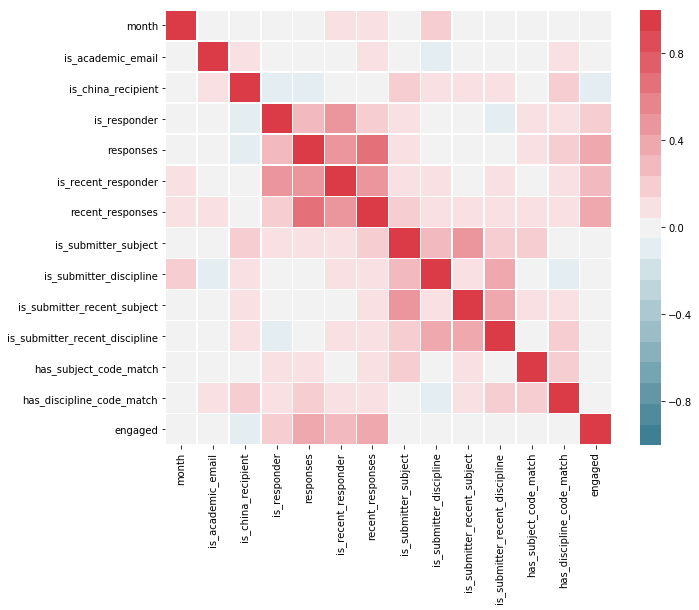

In [14]:
# Visualize correlation
fig, ax = plt.subplots(figsize=(10,8))         
sns.heatmap(engagement.corr(),vmin=-1, vmax=1,cmap=sns.diverging_palette(h_neg=220, h_pos=10, n=21), linewidths=.5, ax=ax);

Small correlation on academic email, stronger correlation on is_responder, is_recent_responder, is_submitter_recent_subject and is_submitter_recent_discipline, strongest correlations on responses and recent_responses

### View relationship of each feature to the target

(While not expecting to see a great deal on binary features)

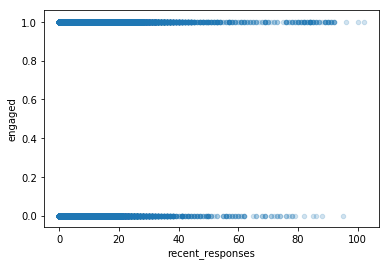

In [15]:
ax = engagement.plot(kind='scatter', x = 'recent_responses', y = 'engaged', alpha =.2)

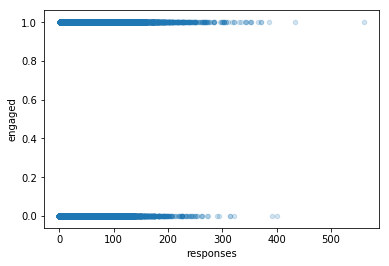

In [22]:
ax = engagement.plot(kind='scatter', x = 'responses', y = 'engaged', alpha =.2)

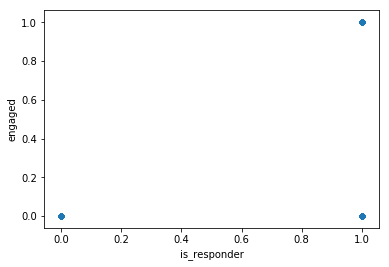

In [16]:
ax = engagement.plot(kind='scatter', x = 'is_responder', y = 'engaged', alpha =.2)

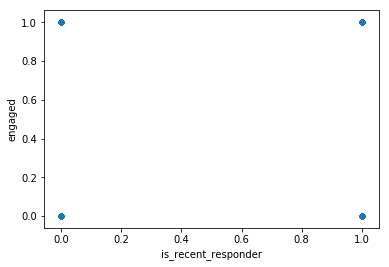

In [17]:
ax = engagement.plot(kind='scatter', x = 'is_recent_responder', y = 'engaged', alpha =.2)

As expected, scatter plots not showing a whole lot on the binary features. Responses and recent_responses map better as aren't binary values so may be worth investigating probability. However the scatter for is_responder does indicate that no engagement was made by people who weren't responders ... over a dataset of this size seems to be a strong conclusion that non responders are not a valuable mailing segment

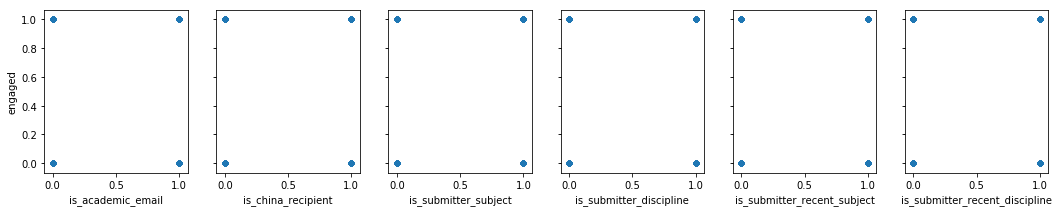

In [18]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 6, sharey=True, figsize=(18, 3))

engagement.plot(kind='scatter', x='is_academic_email', y='engaged', ax=ax0)
engagement.plot(kind='scatter', x='is_china_recipient', y='engaged', ax=ax1)
engagement.plot(kind='scatter', x='is_submitter_subject', y='engaged', ax=ax2)
engagement.plot(kind='scatter', x='is_submitter_discipline', y='engaged', ax=ax3)
engagement.plot(kind='scatter', x='is_submitter_recent_subject', y='engaged', ax=ax4)
engagement.plot(kind='scatter', x='is_submitter_recent_discipline', y='engaged', ax=ax5);

Testing through the other positively correlated binary features, all others have the four-dot pattern (lending credence to signficance of is_responder = 0 as a feature of non-engagement)

### Logistic Regression

In [19]:
engagement_lr = engagement.drop(['cellcode', 'product_discipline'], axis='columns')
engagement_lr.head(5)

,month,is_academic_email,is_china_recipient,is_responder,responses,is_recent_responder,recent_responses,is_submitter_subject,is_submitter_discipline,is_submitter_recent_subject,is_submitter_recent_discipline,has_subject_code_match,has_discipline_code_match,engaged
0,1,1,0,1,20,0,0,0,0,0,0,0,0,0
1,1,1,0,1,2,0,0,0,0,0,0,0,1,0
2,1,0,1,1,4,1,1,1,1,0,0,1,1,0
3,1,1,0,1,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,1,0,1,0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_col = 'engaged'

X = engagement_lr.drop(target_col, axis='columns')
y = engagement_lr.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8361715613775618

In [21]:
y.value_counts(normalize=True)

0    0.804556
1    0.195444
Name: engaged, dtype: float64

Model is showing 83-84% against 80% actual so there is some signal from the features

### Logistic Regression on two features

In [22]:
feature_cols = ['responses', 'recent_responses']
target_col = 'engaged'

X = engagement_lr.loc[:, feature_cols]
y = engagement_lr.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr2 = LogisticRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8346714557363195

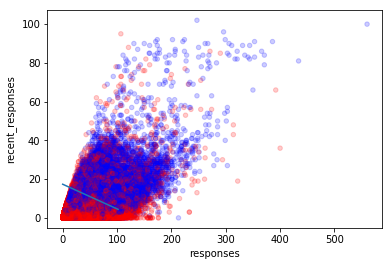

In [23]:
coefs = lr2.coef_[0]
intercept = lr2.intercept_

x_values = np.array([X.loc[:, 'responses'].min(), X.loc[:, 'recent_responses'].max()])
y_values = (-1./coefs[1]) * (coefs[0] * x_values + intercept)
colors = np.where(y == 0, 'r', 'b')

ax = X.plot(kind='scatter', x='responses', y='recent_responses', color=colors, alpha=.2)
ax.plot(x_values, y_values, label='Decision Boundary')
plt.show()

This seems to be defining a conjoined boundary of response and recent responses above which engagement is more probable (though not sure beyond that how it should be interpreted)

### Predict probability for responses and recent_responses

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['responses']
target_col = 'engaged'

X = engagement_lr.loc[:, feature_cols]
y = engagement_lr.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr_r = LogisticRegression()

lr_r.fit(X_train, y_train)
lr_r.score(X_test, y_test)


C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8204098880202831

In [25]:
y_pred_prob = lr_r.predict_proba(X_test)

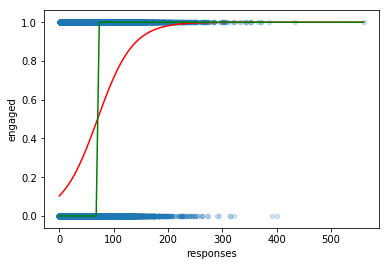

In [26]:
x_grid = np.linspace(start=engagement_lr.loc[:, 'responses'].min(), stop=engagement_lr.loc[:, 'responses'].max(), num=100)
pred_probs = lr_r.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_r.predict(x_grid.reshape(-1, 1))
ax = engagement_lr.plot(kind='scatter', x='responses', y='engaged', alpha=.2)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

feature_cols = ['recent_responses']
target_col = 'engaged'

X = engagement_lr.loc[:, feature_cols]
y = engagement_lr.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y)

lr_rr = LogisticRegression()

lr_rr.fit(X_train, y_train)
lr_rr.score(X_test, y_test)

C:\Users\WTabraham\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.831903655186985

In [28]:
y_pred_prob = lr_rr.predict_proba(X_test)

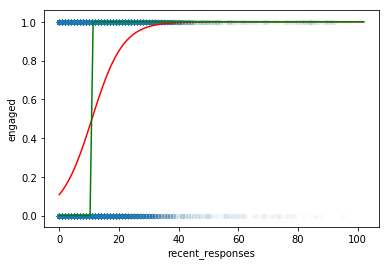

In [29]:
x_grid = np.linspace(start=engagement_lr.loc[:, 'recent_responses'].min(), stop=engagement_lr.loc[:, 'recent_responses'].max(), num=100)
pred_probs = lr_rr.predict_proba(x_grid.reshape(-1, 1))[:, 1]
preds = lr_rr.predict(x_grid.reshape(-1, 1))
ax = engagement_lr.plot(kind='scatter', x='recent_responses', y='engaged', alpha=.02)
ax.plot(x_grid, pred_probs, c='r')
ax.plot(x_grid, preds, c='g');

Seems that approximately 10 recent responses indicate a >50% chance of engagement, likewise c. 66 total prior responses indicate a > 50% chance of engagement

### Test accuracy, recall and precision of recent_responses

In [30]:
from sklearn import metrics

y_pred = lr_rr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[36797,  1267],
       [ 6689,  2577]], dtype=int64)

In [31]:
#Accuracy
(2577 + 36797) / (36797 + 1267 + 6689 + 2577)

0.831903655186985

In [32]:
#Precision
2577 / (2577 + 1267)

0.6703954214360042

In [33]:
#Recall
2577 / (2577 + 6689)

0.2781135333477229

In [34]:
print('precision:', metrics.precision_score(y_test, y_pred))
print('recall:', metrics.recall_score(y_test, y_pred))

precision: 0.6703954214360042
recall: 0.2781135333477229



4. Summary
The dataset has 517 rows with 13 attributes.
The dataset includes both numerical and non-numerical feature variables.
The non-numerical feature variables 'month' and 'day' can be classified as 'Catogorical-Nominal' in the contect of the planned prediction model.
The dataset does not have any null values.
All feature varables excluding 'RH' and 'rain' have a positive correlation whilst 'RH' and 'rain' have a negative correlation to the area of the forest fire. This can be considered a fare observation andboth 'RH' and 'rain' will limit the spread of forest fire.
Output variable 'area' seems to contain a couple of outliers with values of over 600. These values may affect a generalised model. Hence it's sensible to exclude these outliers from the dataset
'DC','RH','wind' and 'area' seems to be slightly more skewed compared to the rest of the variavles . These can be transformed to build an effective predictive model, skeweness of the other variables are negligeable
Variables FFMC, DC, ISI, temp, RH, wind and rain* has a notable linear relationship to the area** of forest fire.
No clear indication of a specific set of days where forest fires are more likely to occur
The two Catogorical-Nominal feature variables need to be dummy coded to be used in building the predictive model
Most normal dummy variables 'month_aug' and 'day_sun' will be dropped from dummy_codes
'month_sept' and 'day_sat' have a notable positive correlation whilst 'month_mar', 'day_fri, and 'day_thu' have a notable negative correlation to the area of the forest fire.
5. Conclusion
Considering the above EDA I plan to implement a linear regression model to predict the 'area' of forest fire
As there are a considerable amount of feature variables, series of tests will be done evaluating the MAE,MSE,RMSE etc to determined the best set of feature variable to build the model
Considering the limited number of records for train-test split, K Fold Cross Validation will be used to evaluate the model

## Summary

- Dataset has 189,318 rows with 16 attributes, including numerical and non-numerical features, and contains no null values
- The non numerical features 'cellcode' and 'product_discipline' could be incoporated if dummy coded or brought in as numeric variable
- Feature variables show small correlation on academic email, stronger correlation on is_responder, is_recent_responder, is_submitter_recent_subject and is_submitter_recent_discipline, strongest correlations on responses and recent_responses, with no correlation or negligible negative correlation on remaining features
- Scatter visualizations show some limitations of binary features, though indicate that is_responder = 0 is a feature of non-engagement
- Probabilities mapped to scatter for the counts of responses and recent responses give provide indicative levels at which the probabaility of engagement is > 50% (c.66 and c.10 respectively)

## Takeaways/Limitations/Things to try

- While a strong indicator of non engagement, is_responder = 0 cannot function as a solely non-responsive feature (chicken and egg scenario - if only former responders respond, how did they get their first response)
- This would seem to indicate that despite its size, this sample dataset does not capture some of the finer detail (... this could potentially be addressed by later applying a different randomized dataset to the final model)
- Had thought binary indicators of feature variables would be preferrable to value counts of said features, but would have been better to bring value counts into the dataset and derive binary variable if required (bringing in counts still preserves the negative class, and only provides more context on the positive class)
- May be worth bringing in campaigns received (prior and recent) as the overall dataset is a view of engagement from receipt (unsure if would show anything, but worth trying)
- I should have mapped the non-numerical variables to numeric category or dummy coded indicators
- If I had removed the non relevant columns in part 1 of this project, I could acquire a larger dataset. Due to file size limitations, 189k were selected as a subset for use in this model, removing non relevant columns may permit the suggested maximum of 250k rows (not certain if this is wise or not)
- I did not assess skewness or central tendencies as assumed the largely binary features would not show a great deal (should actually assess)
- Similarly I did not check for outliers, but with a counts based dataset this may become necessary

## Conclusions

Considering the above EDA and takeaways I plan to: 
- enhance the data going into the model (remove extraneous data for larger dataset, replace currently binary feature variables with counts)
- dummy out non numeric variables for incorporation into the model
- being a classification problem I will continue using the Logistic Regression model to predict the campaign engagement
- testing of the feature variable probabilities, threshold adjustment and f beta manipulations may be used to deetermine the best set of feature variables for model building
